# Data Importing and Cleaning

I'll begin by loading and exploring the dataset to gain insights and address any missing values. Let me start by importing the data and summarizing its structure.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/nearest-earth-objects(1910-2024).csv'
neo_data = pd.read_csv(file_path)

# Display the first few rows and get basic info of the dataset
neo_data_info = neo_data.info()
neo_data_head = neo_data.head()

neo_data_info, neo_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


(None,
     neo_id                name  absolute_magnitude  estimated_diameter_min  \
 0  2162117  162117 (1998 SD15)               19.14                0.394962   
 1  2349507    349507 (2008 QY)               18.50                0.530341   
 2  2455415    455415 (2003 GA)               21.45                0.136319   
 3  3132126           (2002 PB)               20.63                0.198863   
 4  3557844           (2011 DW)               22.70                0.076658   
 
    estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
 0                0.883161         Earth       71745.401048   5.814362e+07   
 1                1.185878         Earth      109949.757148   5.580105e+07   
 2                0.304818         Earth       24865.506798   6.720689e+07   
 3                0.444672         Earth       78890.076805   3.039644e+07   
 4                0.171412         Earth       56036.519484   6.311863e+07   
 
    is_hazardous  
 0         False  
 1       



---



**The dataset contains 338,199 records with 9 columns:**

**neo_id:** Unique identifier for each NEO.

**name:** The name of the NEO.

**absolute_magnitude:** The intrinsic brightness of the NEO (missing values present).

**estimated_diameter_min:** Minimum estimated diameter (missing values present).

**estimated_diameter_max:** Maximum estimated diameter (missing values present).


**orbiting_body:** The celestial body around which the NEO orbits (mostly Earth).

**relative_velocity:** The speed at which the NEO moves relative to Earth.

**miss_distance:** The closest distance the NEO will approach Earth.

**is_hazardous:** A boolean indicating whether the NEO is classified as hazardous.

*Next, I'll address missing values and proceed with exploratory data analysis (EDA):*




---



In [3]:
# Check for missing values in the dataset
missing_values = neo_data.isnull().sum()

# Percentage of missing values in each column
missing_percent = (missing_values / len(neo_data)) * 100

missing_values, missing_percent


(neo_id                     0
 name                       0
 absolute_magnitude        28
 estimated_diameter_min    28
 estimated_diameter_max    28
 orbiting_body              0
 relative_velocity          0
 miss_distance              0
 is_hazardous               0
 dtype: int64,
 neo_id                    0.000000
 name                      0.000000
 absolute_magnitude        0.008279
 estimated_diameter_min    0.008279
 estimated_diameter_max    0.008279
 orbiting_body             0.000000
 relative_velocity         0.000000
 miss_distance             0.000000
 is_hazardous              0.000000
 dtype: float64)



---



***The dataset has a very small percentage (0.008%) of missing values in the following columns:***

**absolute_magnitude:** 28 missing values

**estimated_diameter_min:** 28 missing values

**estimated_diameter_max:** 28 missing values

Given the small percentage, we can handle these missing values by either filling them with appropriate values (mean, median, etc.) or dropping the rows.

To handle the missing values, I will fill the numerical columns (absolute_magnitude, estimated_diameter_min, and estimated_diameter_max) with their respective median values, as it's more robust against outliers compared to the mean.

Then, I will proceed with exploratory data analysis (EDA).



---



In [4]:
# Fill missing values with the median for numerical columns
neo_data['absolute_magnitude'].fillna(neo_data['absolute_magnitude'].median(), inplace=True)
neo_data['estimated_diameter_min'].fillna(neo_data['estimated_diameter_min'].median(), inplace=True)
neo_data['estimated_diameter_max'].fillna(neo_data['estimated_diameter_max'].median(), inplace=True)

# Confirm no missing values remain
missing_values_after = neo_data.isnull().sum()

# Proceed with basic statistics for key columns to aid EDA
summary_stats = neo_data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']].describe()

missing_values_after, summary_stats


(neo_id                    0
 name                      0
 absolute_magnitude        0
 estimated_diameter_min    0
 estimated_diameter_max    0
 orbiting_body             0
 relative_velocity         0
 miss_distance             0
 is_hazardous              0
 dtype: int64,
        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
 count       338199.000000           338199.000000           338199.000000   
 mean            22.932514                0.157805                0.352863   
 std              2.911096                0.313873                0.701842   
 min              9.250000                0.000511                0.001143   
 25%             20.740000                0.025384                0.056760   
 50%             22.800000                0.073207                0.163697   
 75%             25.100000                0.189041                0.422708   
 max             33.580000               37.545248               83.953727   
 
        relative_vel



---



**The missing values have been successfully filled, and there are no remaining null values. Here's a quick summary of key statistics:**

**Absolute Magnitude:** Ranges from 9.25 to 33.58 with a median of 22.8.

**Estimated Diameter (min):** Ranges from 0.0005 km to 37.54 km with a median of 0.073 km.

**Estimated Diameter (max):** Ranges from 0.001 km to 83.95 km with a median of 0.164 km.

**Relative Velocity:** NEOs have velocities ranging from 203 to 291,781 km/h, with a median of 47,560 km/h.

**Miss Distance:** Ranges from 6,746 km to 74,798,650 km, with a median distance of 43,327,000 km.

*I'll now move on to visualizing some patterns in the data for further insights: ​*



---



# Exploratory Data Analysis (EDA)

In [5]:
numerical_summary = neo_data.describe().transpose()

palette = sns.color_palette("viridis", as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
neo_id,338199.000000,17599388.682019,22872246.428932,2000433.000000,3373980.000000,3742127.000000,54053736.500000,54462807.000000
absolute_magnitude,338199.000000,22.932514,2.911096,9.250000,20.740000,22.800000,25.100000,33.580000
estimated_diameter_min,338199.000000,0.157805,0.313873,0.000511,0.025384,0.073207,0.189041,37.545248
estimated_diameter_max,338199.000000,0.352863,0.701842,0.001143,0.056760,0.163697,0.422708,83.953727
relative_velocity,338199.000000,51060.662908,26399.238435,203.346433,30712.031471,47560.465474,66673.820614,291781.106613
miss_distance,338199.000000,41535350.932190,20773990.246102,6745.532516,24945397.527133,43326743.828348,59339605.219975,74798651.452197


In [6]:
pd.DataFrame(neo_data["name"].value_counts()[0:10])

,count
name,
277810 (2006 FV35),211
469219 Kamo`oalewa (2016 HO3),197
(2014 OL339),192
(2017 FZ2),186
(2023 FW13),169
(2022 YF4),151
164207 (2004 GU9),135
85770 (1998 UP1),101
138852 (2000 WN10),99


<ipython-input-7-bf2dbdeb8c4f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_hazardous', data=neo_data, ax=ax2, palette=palette)
<ipython-input-7-bf2dbdeb8c4f>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(neo_data["is_hazardous"].unique())


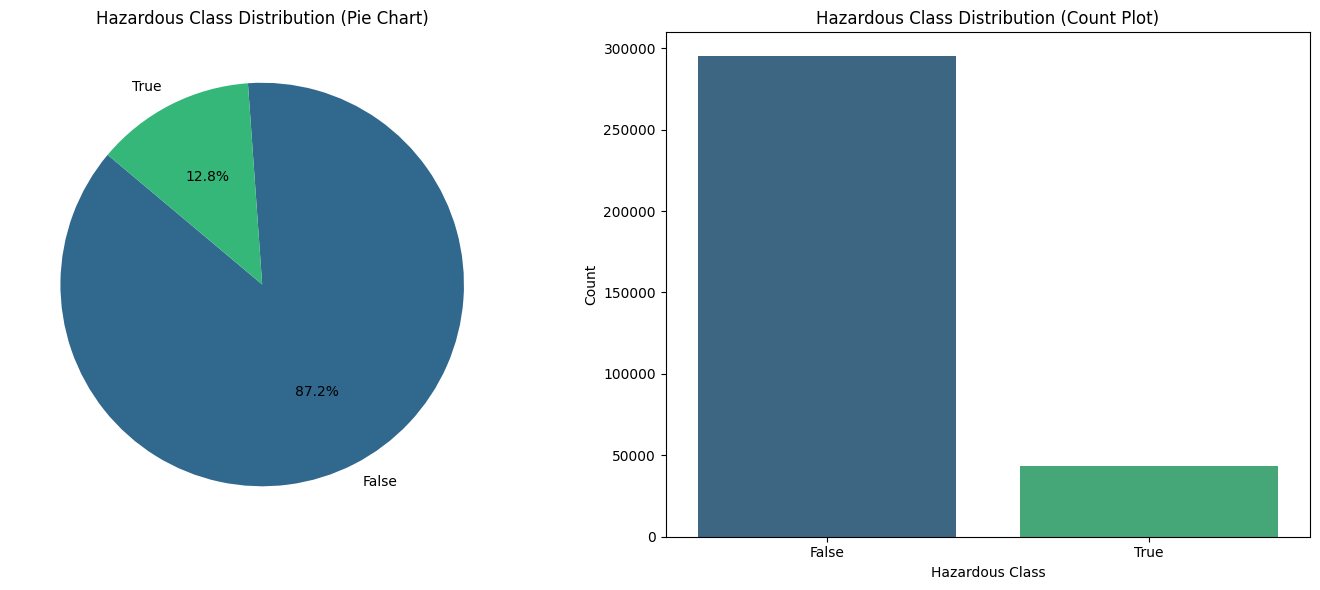

In [7]:
hazardous_counts = neo_data['is_hazardous'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(hazardous_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(hazardous_counts, labels=neo_data["is_hazardous"].unique(), autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Hazardous Class Distribution (Pie Chart)')
sns.countplot(x='is_hazardous', data=neo_data, ax=ax2, palette=palette)
ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(neo_data["is_hazardous"].unique())
plt.tight_layout()
plt.show()

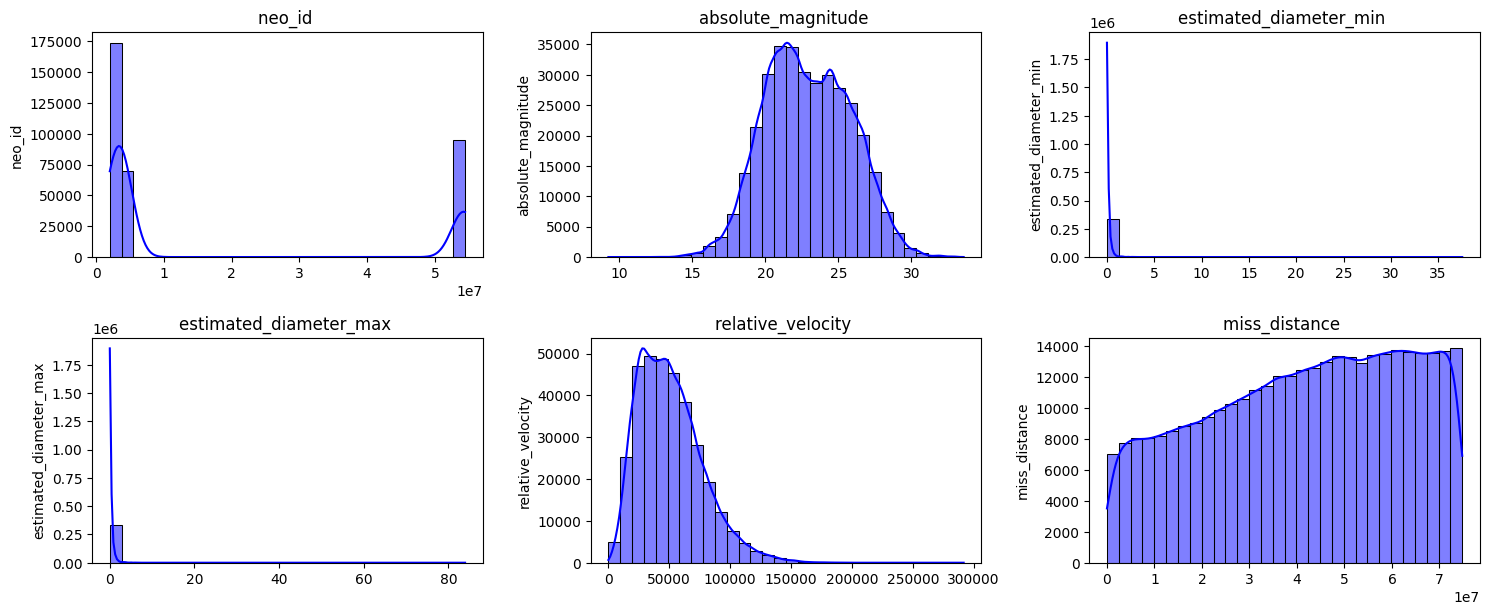

In [8]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(neo_data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=neo_data, x=feature, bins=30, kde=True, color='blue')
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

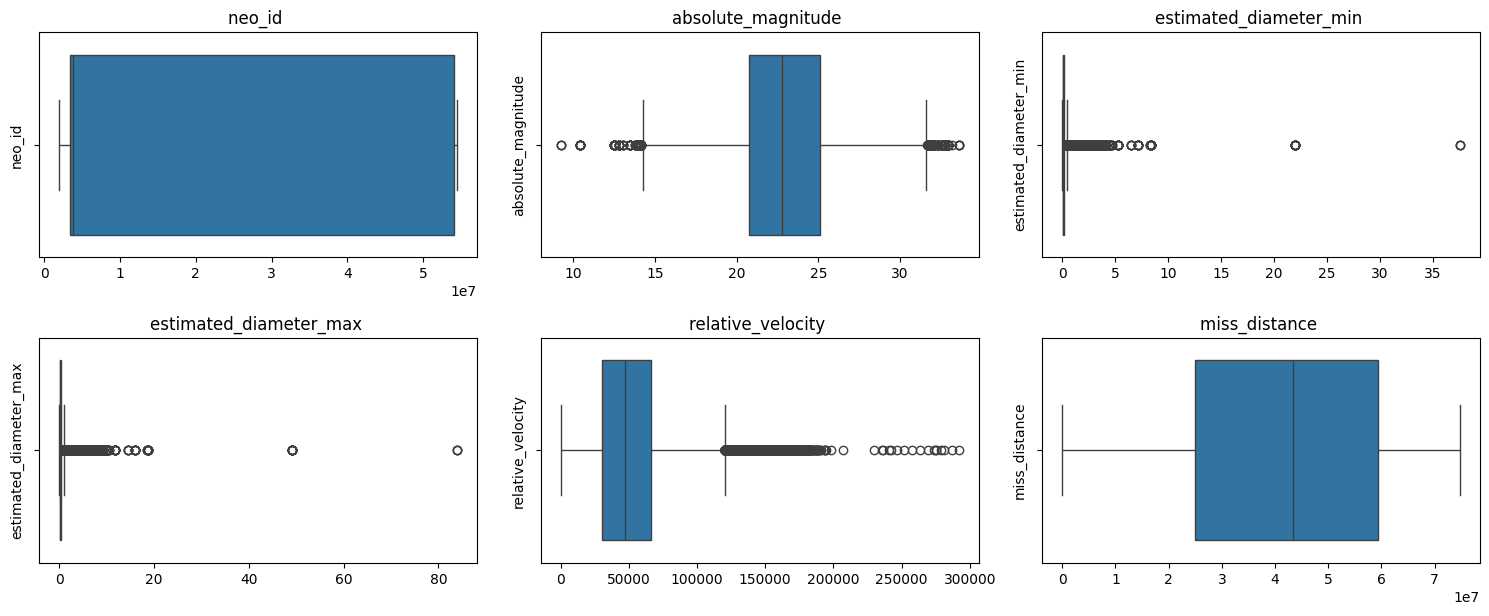

In [9]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(neo_data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=neo_data, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

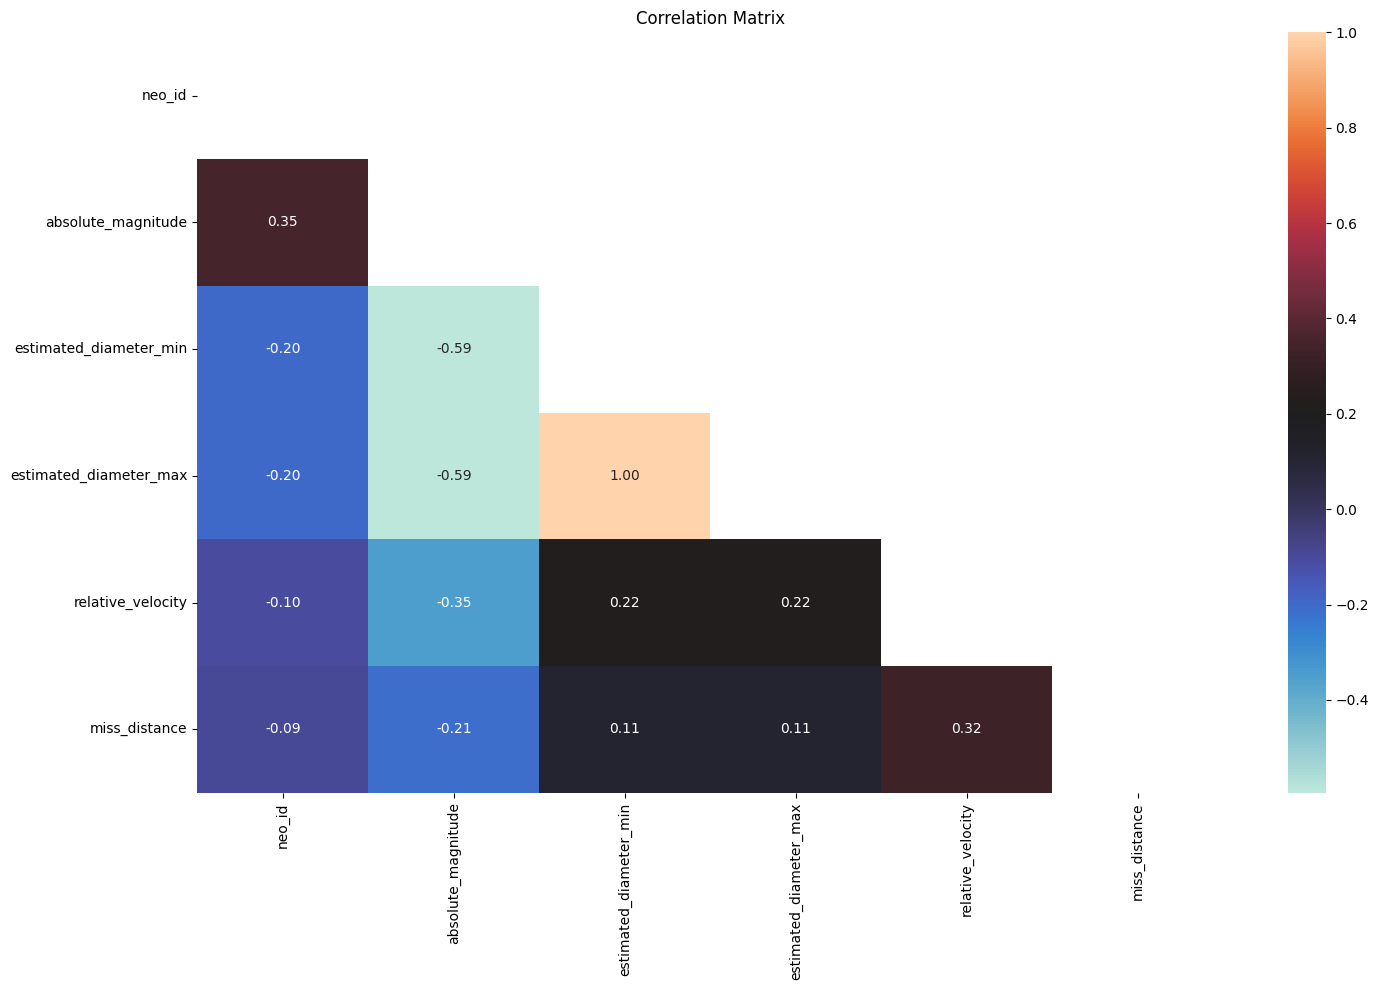

In [10]:
import numpy as np # import the numpy library

corr = neo_data.select_dtypes(include='number').corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_) # use np to call the triu and ones functions

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

<ipython-input-11-e9eae5b12a2a>:35: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


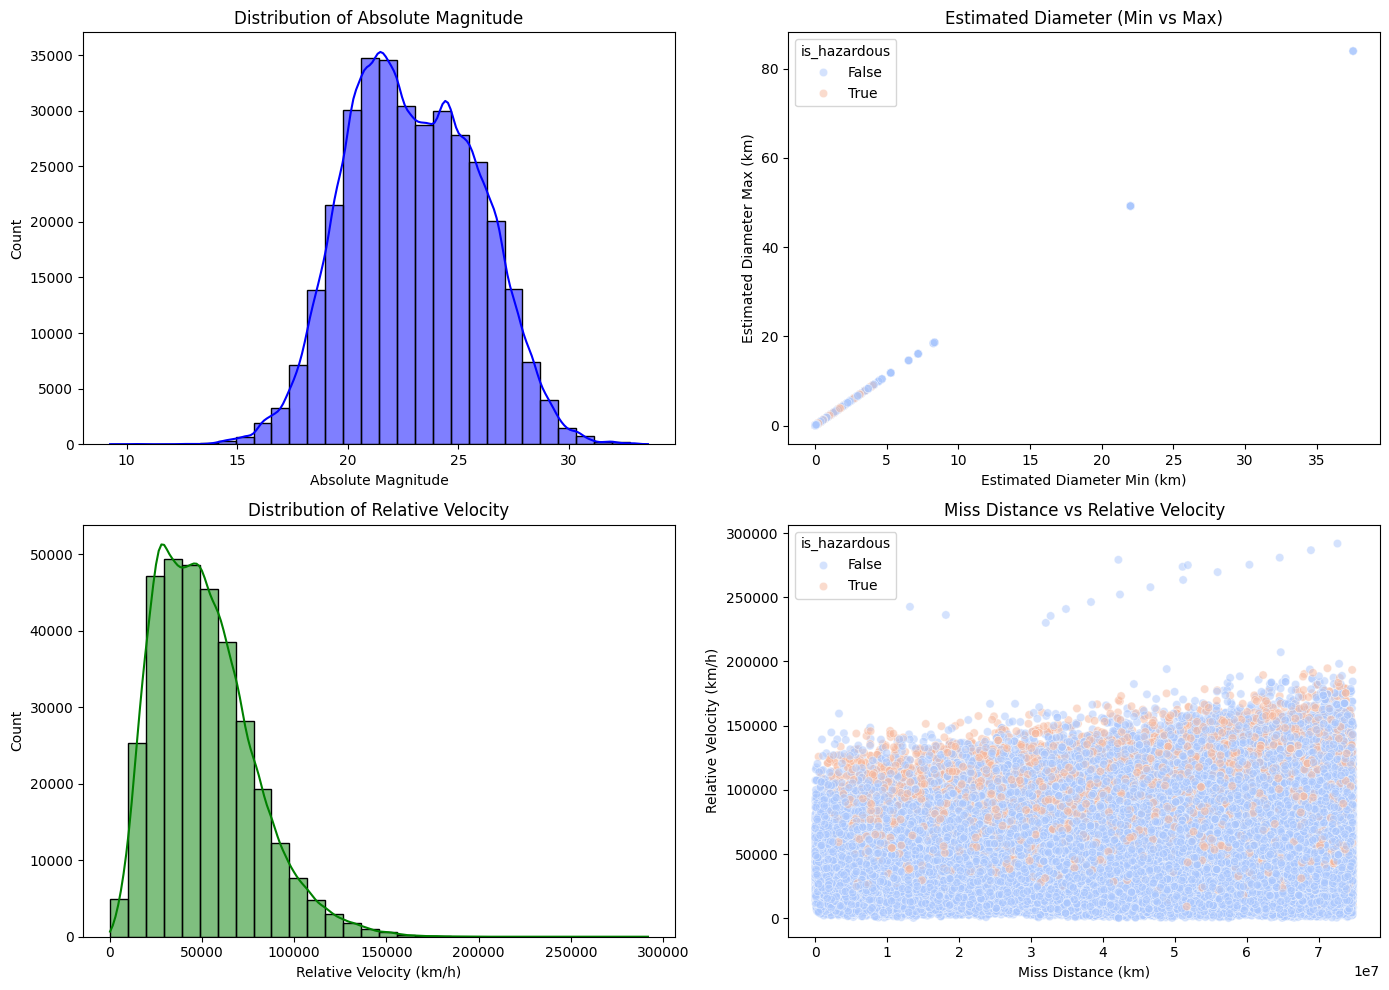

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot grid
plt.figure(figsize=(14, 10))

# Histogram of Absolute Magnitude
plt.subplot(2, 2, 1)
sns.histplot(neo_data['absolute_magnitude'], bins=30, kde=True, color='blue')
plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Count')

# Scatter plot of Estimated Diameter (Min vs Max)
plt.subplot(2, 2, 2)
sns.scatterplot(x=neo_data['estimated_diameter_min'], y=neo_data['estimated_diameter_max'], hue=neo_data['is_hazardous'], palette='coolwarm', alpha=0.5)
plt.title('Estimated Diameter (Min vs Max)')
plt.xlabel('Estimated Diameter Min (km)')
plt.ylabel('Estimated Diameter Max (km)')

# Distribution of Relative Velocity
plt.subplot(2, 2, 3)
sns.histplot(neo_data['relative_velocity'], bins=30, kde=True, color='green')
plt.title('Distribution of Relative Velocity')
plt.xlabel('Relative Velocity (km/h)')
plt.ylabel('Count')

# Scatter plot of Miss Distance vs Relative Velocity
plt.subplot(2, 2, 4)
sns.scatterplot(x=neo_data['miss_distance'], y=neo_data['relative_velocity'], hue=neo_data['is_hazardous'], palette='coolwarm', alpha=0.5)
plt.title('Miss Distance vs Relative Velocity')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Relative Velocity (km/h)')

plt.tight_layout()
plt.show()




---



**The EDA provide the following insights:**

1. Distribution of Hazardous vs. Non-Hazardous NEOs:

There are significantly more non-hazardous NEOs than hazardous ones.

This suggests that the dataset is imbalanced, which we will need to address during model training.

2. Relative Velocity:

The relative velocities of both hazardous and non-hazardous NEOs have wide ranges, but hazardous NEOs tend to have slightly higher velocities on average.

3. Miss Distance:

Hazardous NEOs generally have a closer miss distance compared to non-hazardous ones, which is expected since proximity is a key factor in determining hazard levels.





---



# Data Preprocessing

**addressing the class imbalance and preparing the features for model training.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = neo_data.drop(['neo_id', 'name', 'is_hazardous', 'orbiting_body'], axis=1)  # Dropping ID, name, and orbiting_body columns as they are not useful for modeling
y = neo_data['is_hazardous']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical features (relative_velocity, miss_distance, etc.)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance using SMOTE (Oversampling the minority class)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Verifying the class distribution after applying SMOTE
y_train_resampled.value_counts()


,count
is_hazardous,
False,236029
True,236029


# Model Training and Evaluation

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Logistic Regression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_lr = logistic_regression.predict(X_test_scaled)
y_pred_proba_lr = logistic_regression.predict_proba(X_test_scaled)[:, 1]

# Evaluation
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_proba_lr)

# Cross-validation
cv_scores_lr = cross_val_score(logistic_regression, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store results
results = {}
results['Logistic Regression'] = {
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr,
    'AUC-ROC': auc_roc_lr,
    'Cross-Validation Scores': cv_scores_lr
}


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_dt = decision_tree.predict(X_test_scaled)
y_pred_proba_dt = decision_tree.predict_proba(X_test_scaled)[:, 1]

# Evaluation
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
auc_roc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Cross-validation
cv_scores_dt = cross_val_score(decision_tree, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store results
results['Decision Tree'] = {
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt,
    'AUC-ROC': auc_roc_dt,
    'Cross-Validation Scores': cv_scores_dt
}


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_rf = random_forest.predict(X_test_scaled)
y_pred_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]

# Evaluation
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Cross-validation
cv_scores_rf = cross_val_score(random_forest, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store results
results['Random Forest'] = {
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf,
    'AUC-ROC': auc_roc_rf,
    'Cross-Validation Scores': cv_scores_rf
}


In [ ]:
'''from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

# Evaluation
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_roc_svm = roc_auc_score(y_test, y_pred_proba_svm)

# Cross-validation
cv_scores_svm = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store results
results['Support Vector Machine'] = {
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1-Score': f1_svm,
    'AUC-ROC': auc_roc_svm,
    'Cross-Validation Scores': cv_scores_svm
}
'''

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluation
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
auc_roc_knn = roc_auc_score(y_test, y_pred_proba_knn)

# Cross-validation
cv_scores_knn = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store results
results['K-Nearest Neighbors'] = {
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn,
    'AUC-ROC': auc_roc_knn,
    'Cross-Validation Scores': cv_scores_knn
}


In [17]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

# XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

# Predictions for XGB
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Evaluation for XGB
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_roc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Cross-validation for XGB
cv_scores_xgb = cross_val_score(xgb, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store XGB results
results['XGBClassifier'] = {
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb,
    'AUC-ROC': auc_roc_xgb,
    'Cross-Validation Scores': cv_scores_xgb
}


In [18]:

# Neural Network
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train_resampled, y_train_resampled)

# Predictions for Neural Network
y_pred_mlp = mlp.predict(X_test_scaled)
y_pred_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]

# Evaluation for Neural Network
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)
auc_roc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)

# Cross-validation for Neural Network
cv_scores_mlp = cross_val_score(mlp, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc')

# Store Neural Network results
results['Neural Network'] = {
    'Precision': precision_mlp,
    'Recall': recall_mlp,
    'F1-Score': f1_mlp,
    'AUC-ROC': auc_roc_mlp,
    'Cross-Validation Scores': cv_scores_mlp
}


In [19]:
# Display results
for name, metrics in results.items():
  print(f'{name}:')
  print(f'  Precision: {metrics["Precision"]:.4f}')
  print(f'  Recall: {metrics["Recall"]:.4f}')
  print(f'  F1-Score: {metrics["F1-Score"]:.4f}')
  print(f'  AUC-ROC: {metrics["AUC-ROC"]:.4f}')
  print(f'  Cross-Validation Scores: {metrics["Cross-Validation Scores"]}')
  print('\n')

# Select the best-performing model based on AUC-ROC
best_model = max(results, key=lambda x: results[x]['AUC-ROC'])
print(f'Best performing model: {best_model}')


Logistic Regression:
  Precision: 0.3115
  Recall: 0.8775
  F1-Score: 0.4597
  AUC-ROC: 0.8379
  Cross-Validation Scores: [0.83585222 0.83447836 0.83360701 0.83784238 0.83557305]


Decision Tree:
  Precision: 0.5416
  Recall: 0.6630
  F1-Score: 0.5962
  AUC-ROC: 0.7905
  Cross-Validation Scores: [0.86937042 0.92668305 0.91883447 0.92848311 0.92389639]


Random Forest:
  Precision: 0.6353
  Recall: 0.6975
  F1-Score: 0.6649
  AUC-ROC: 0.9482
  Cross-Validation Scores: [0.96816872 0.9935376  0.99346326 0.99381696 0.9932186 ]


K-Nearest Neighbors:
  Precision: 0.4107
  Recall: 0.7699
  F1-Score: 0.5357
  AUC-ROC: 0.8707
  Cross-Validation Scores: [0.95509949 0.95481961 0.95464495 0.9552448  0.9540838 ]


XGBClassifier:
  Precision: 0.3557
  Recall: 0.9231
  F1-Score: 0.5135
  AUC-ROC: 0.9053
  Cross-Validation Scores: [0.912239   0.934872   0.93519626 0.9340665  0.93399547]


Neural Network:
  Precision: 0.3207
  Recall: 0.9834
  F1-Score: 0.4837
  AUC-ROC: 0.8906
  Cross-Validation Scor

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert results dictionary to DataFrame for easier plotting
metrics_df = pd.DataFrame(results).T

# Extract relevant metrics for comparison
metrics_to_plot = metrics_df[['Precision', 'Recall', 'F1-Score', 'AUC-ROC']]

# Melt the DataFrame for seaborn compatibility
metrics_melted = metrics_to_plot.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
metrics_melted.columns = ['Model', 'Metric', 'Score']


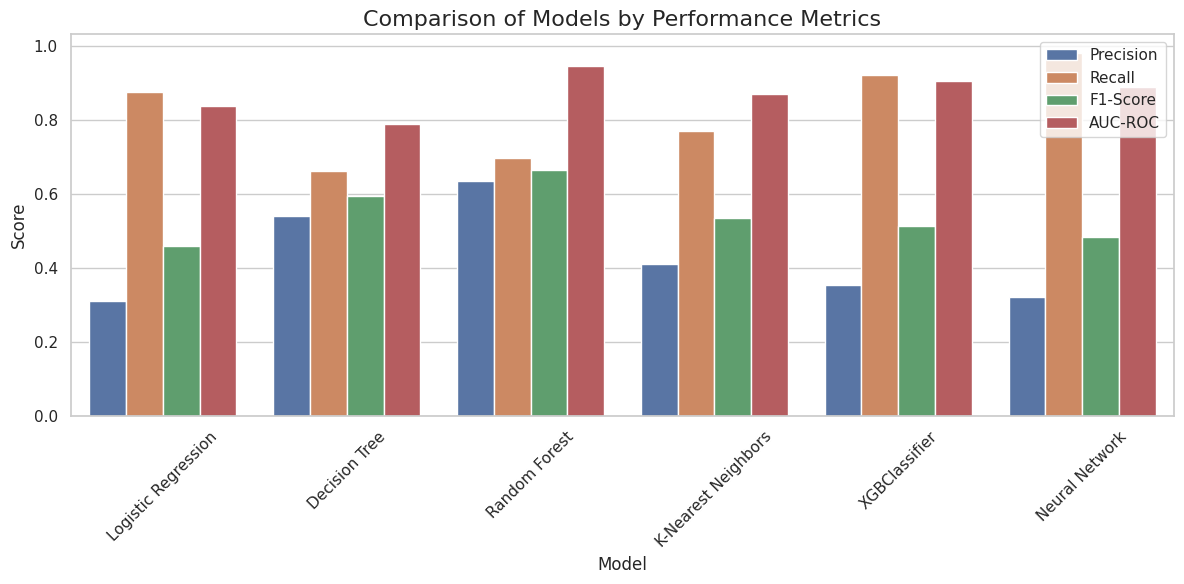

In [21]:
# Set plot style
sns.set(style='whitegrid')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_melted)

# Add labels and title
plt.title('Comparison of Models by Performance Metrics', fontsize=16)
plt.ylabel('Score')
plt.xlabel('Model')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(loc='best')
plt.tight_layout()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 70.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
Model: Logistic Regression
              precision    recall  f1-score   support

       False       0.98      0.72      0.83     59008
        True       0.31      0.88      0.46      8632

    accuracy                           0.74     67640
   macro avg       0.64      0.80      0.64     67640
weighted avg       0.89      0.74      0.78     67640

Confusion Matrix:
[[42262 16746]
 [ 1057  7575]]



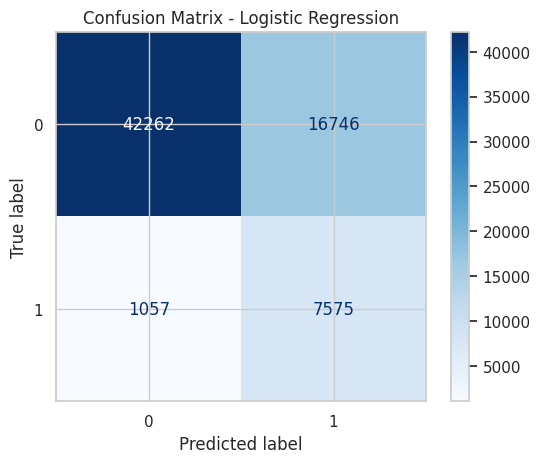

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.95      0.92      0.93     59008
        True       0.54      0.66      0.60      8632

    accuracy                           0.89     67640
   macro avg       0.75      0.79      0.76     67640
weighted avg       0.90      0.89      0.89     67640

Confusion Matrix:
[[54164  4844]
 [ 2909  5723]]



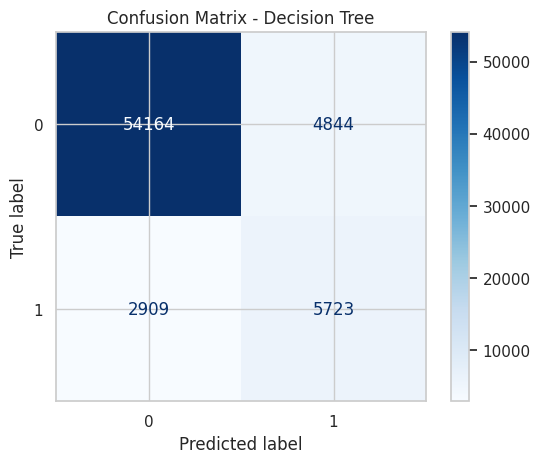

Model: Random Forest
              precision    recall  f1-score   support

       False       0.96      0.94      0.95     59008
        True       0.64      0.70      0.66      8632

    accuracy                           0.91     67640
   macro avg       0.80      0.82      0.81     67640
weighted avg       0.91      0.91      0.91     67640

Confusion Matrix:
[[55551  3457]
 [ 2611  6021]]



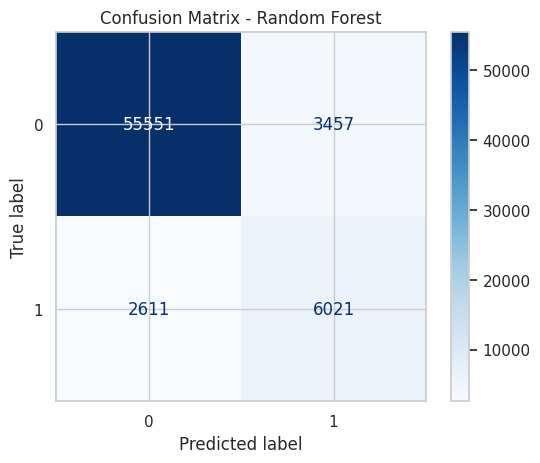

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

       False       0.96      0.84      0.90     59008
        True       0.41      0.77      0.54      8632

    accuracy                           0.83     67640
   macro avg       0.69      0.80      0.72     67640
weighted avg       0.89      0.83      0.85     67640

Confusion Matrix:
[[49473  9535]
 [ 1986  6646]]



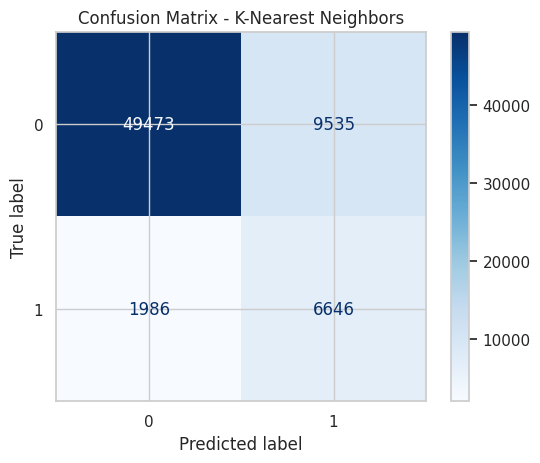

Model: XGBClassifier
              precision    recall  f1-score   support

       False       0.99      0.76      0.86     59008
        True       0.36      0.92      0.51      8632

    accuracy                           0.78     67640
   macro avg       0.67      0.84      0.68     67640
weighted avg       0.90      0.78      0.81     67640

Confusion Matrix:
[[44573 14435]
 [  664  7968]]



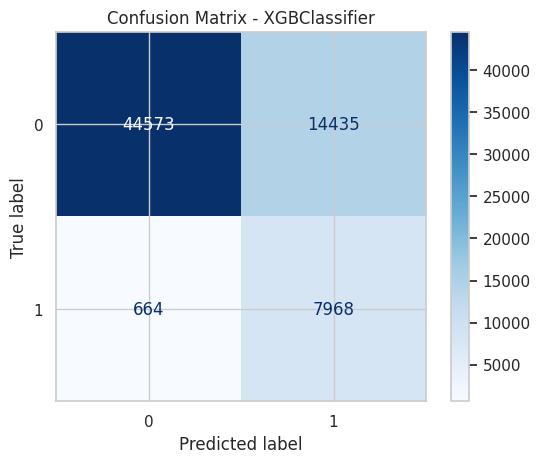

Model: Neural Network
              precision    recall  f1-score   support

       False       1.00      0.70      0.82     59008
        True       0.32      0.98      0.48      8632

    accuracy                           0.73     67640
   macro avg       0.66      0.84      0.65     67640
weighted avg       0.91      0.73      0.78     67640

Confusion Matrix:
[[41026 17982]
 [  143  8489]]



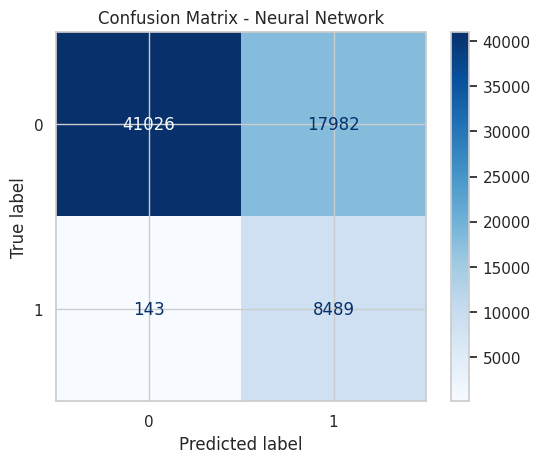

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Loop through all models and generate classification report and confusion matrix
for model_name, model in zip(['Logistic Regression', 'Decision Tree', 'Random Forest',
                              'K-Nearest Neighbors', 'XGBClassifier', 'Neural Network'],
                             [logistic_regression, decision_tree, random_forest, knn, xgb, mlp]):
    print(f"Model: {model_name}")

    # Get predictions
    y_pred = model.predict(X_test_scaled)

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}\n")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

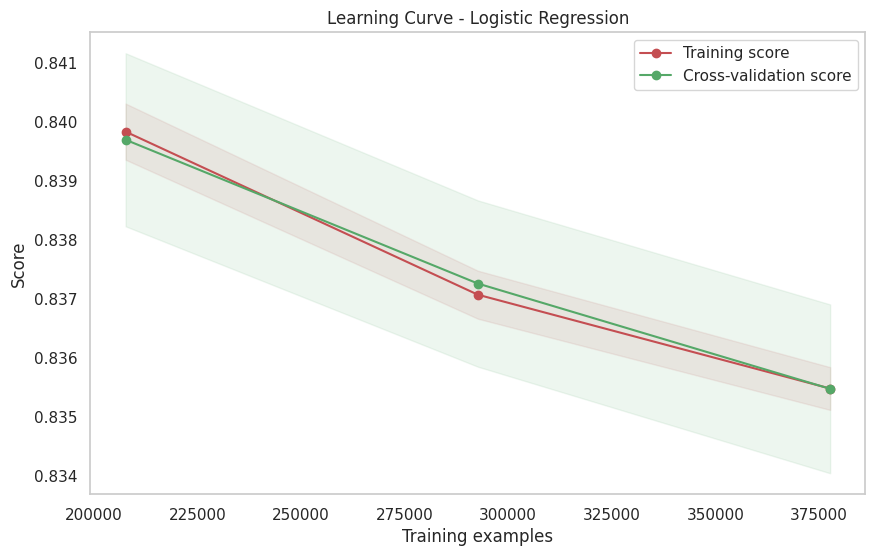

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 459, in _score
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    if cache is not None and response_method in cache:
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 181, in _get_response_values
    response_method_used : str
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1939, in _check_response_method
    # Remove all imaginary parts (even if zero)
AttributeError: DecisionTreeClassifier has none of the following attributes: decision_function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

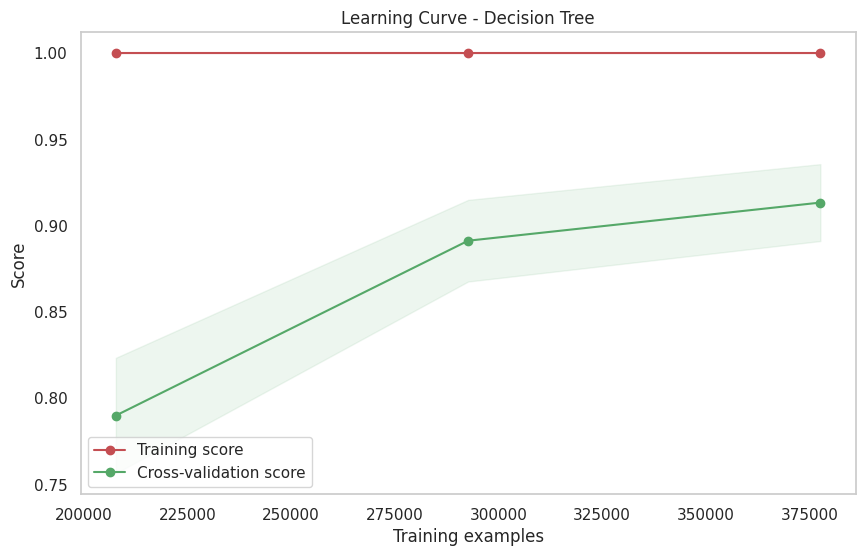

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 459, in _score
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    if cache is not None and response_method in cache:
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 181, in _get_response_values
    response_method_used : str
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1939, in _check_response_method
    # Remove all imaginary parts (even if zero)
AttributeError: RandomForestClassifier has none of the following attributes: decision_function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

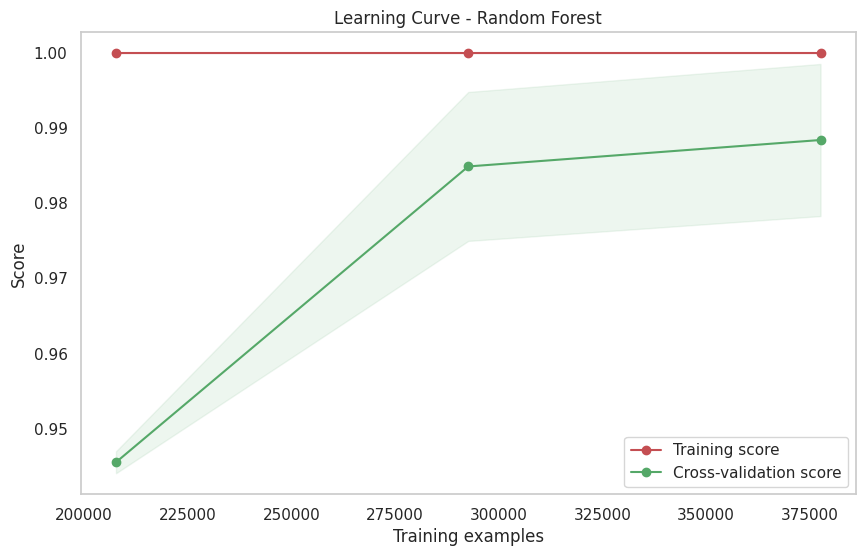

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 459, in _score
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    if cache is not None and response_method in cache:
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 181, in _get_response_values
    response_method_used : str
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1939, in _check_response_method
    # Remove all imaginary parts (even if zero)
AttributeError: KNeighborsClassifier has none of the following attributes: decision_function.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  Fi

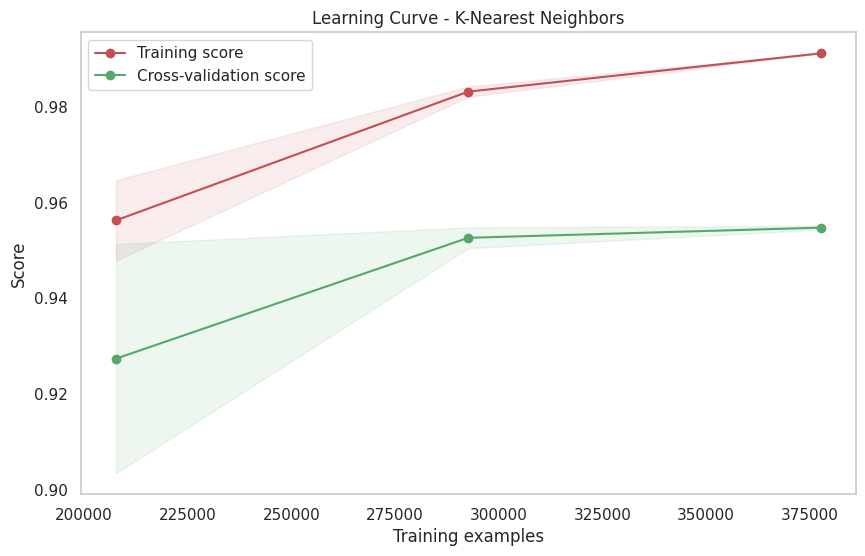

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    return_n_test_samples : bool, default=False
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    .. versionadded:: 1.3
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 471, in _score
    A :class:`~utils.metadata_routing.MetadataRouter` encapsulating
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    except InvalidParameterError as e:
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 627, in roc_auc_score
    "Partial AUC computation not available in "
  File "/usr/loca

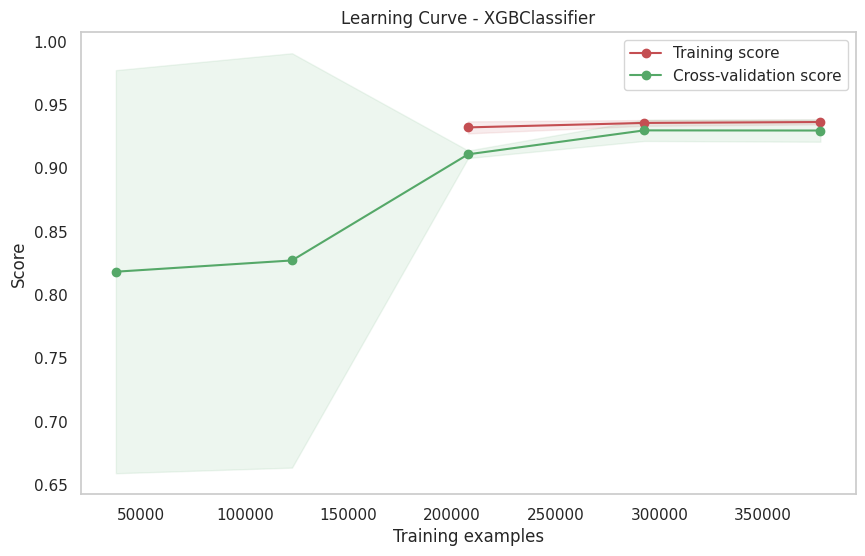

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    return_n_test_samples : bool, default=False
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    .. versionadded:: 1.3
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 471, in _score
    A :class:`~utils.metadata_routing.MetadataRouter` encapsulating
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 214, in wrapper
    except InvalidParameterError as e:
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 627, in roc_auc_score
    "Partial AUC computation not available in "
  File "/usr/loca

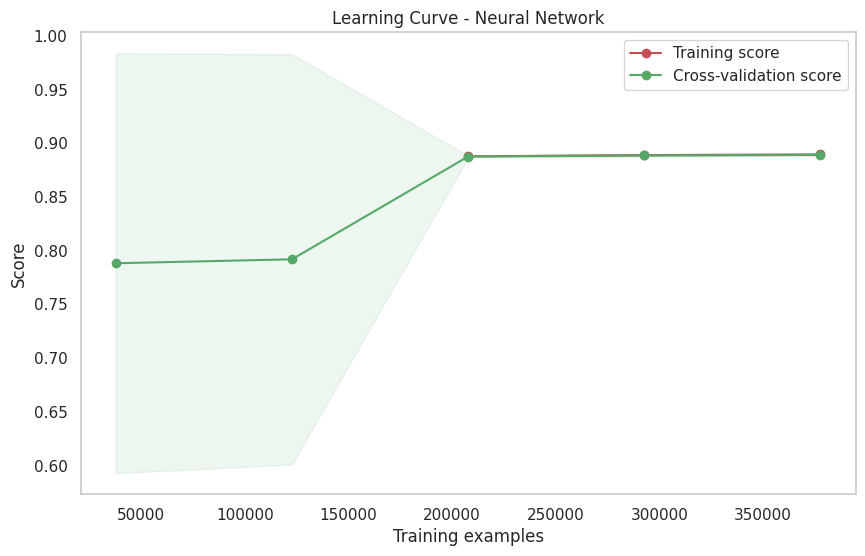

In [25]:
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='roc_auc')

    # Compute the mean and std deviation
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

# Plot learning curves for each model
for model_name, model in zip(['Logistic Regression', 'Decision Tree', 'Random Forest',
                              'K-Nearest Neighbors', 'XGBClassifier', 'Neural Network'],
                             [logistic_regression, decision_tree, random_forest, knn, xgb, mlp]):
    plot_learning_curve(model, f'Learning Curve - {model_name}', X_train_resampled, y_train_resampled, cv=5)
